In [5]:
import os
from deepforest import get_data
from deepforest import deepforest
from keras.utils import plot_model

In [6]:
model = deepforest.deepforest()

Reading config file: deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model.


In [9]:
model.use_release()
model.model.summary()

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/v0.2.1 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/v0.2.1
tracking <tf.Variable 'Variable_10:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_11:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_12:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_13:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_14:0' shape=(9, 4) dtype=float32> anchors
Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________

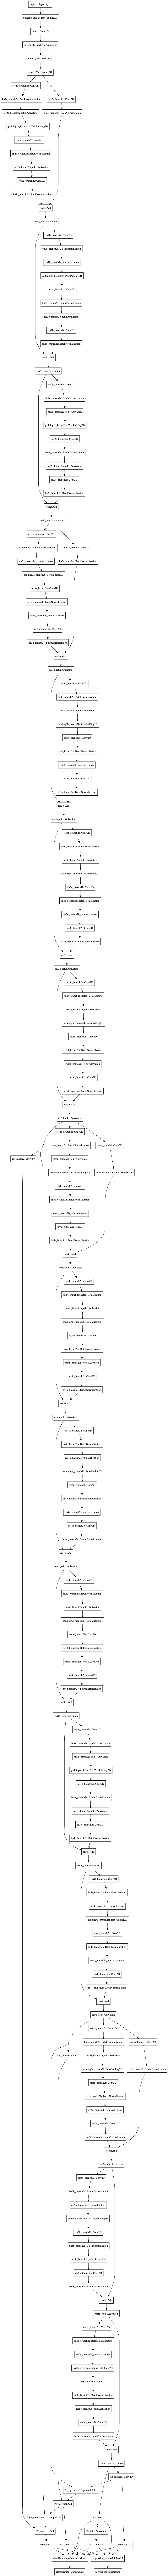

In [8]:
plot_model(model.model)

In [ ]:
annotations = utilities.xml_to_annotations(get_data("SOAP_061.xml"))
annotations.image_path = annotations.image_path.str.replace(".tif",".jpg")
annotations_file = get_data("testfile_multi.csv")
annotations.to_csv(annotations_file,index=False,header=False)

In [ ]:
test_model.config["epochs"] = 3
test_model.config["save-snapshot"] = False
test_model.config["steps"] = 1
test_model.train(annotations=multi_annotations, input_type="fit_generator")
test_model.plot_curves()

In [ ]:
# Test labels
labels = list(test_model.labels.values())
labels.sort()
target_labels = ["Dead","Alive"]
target_labels.sort()

assert labels == target_labels

image_path = get_data("SOAP_061.jpg")
image = test_model.predict_image(image_path= image_path, return_plot=True)
plt.imshow(image[:,:,::-1])

In [ ]:
boxes = test_model.predict_image(image_path= image_path, return_plot=False)
boxes